In [1]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### 数据处理

In [2]:
target = "Covertype"

bool_columns = [
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3",
    "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4",
    "Soil_Type5", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type9",
    "Soil_Type10", "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14",
    "Soil_Type15", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19",
    "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24",
    "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29",
    "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34",
    "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39",
    "Soil_Type40"
]

int_columns = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

feature_columns = (
        int_columns + bool_columns + [target])

train = pd.read_csv('data/forest-cover-type.csv', header=None, names=feature_columns)[:40000]
train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Covertype
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2712,202,4,108,3,1909,218,244,162,4245,...,0,0,0,0,0,0,0,0,0,2
39996,2714,230,7,95,5,1879,209,247,175,4224,...,0,0,0,0,0,0,0,0,0,2
39997,2718,222,7,90,9,1850,211,247,172,4204,...,0,0,0,0,0,0,0,0,0,2
39998,2719,182,5,90,10,1820,222,244,157,4183,...,0,0,0,0,0,0,0,0,0,2


In [3]:
# test_indices:测试数据集索引
# train_indices:训练数据集索引
# valid_indices:验证数据集索引
train_val_indices, test_indices = train_test_split(
    range(len(train)), test_size=0.2, random_state=0)

train_indices, valid_indices = train_test_split(
    train_val_indices, test_size=0.2, random_state=0)

In [4]:
# 所有特征
features = train.columns[:-1].tolist()
features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [5]:
features_num = train[features].nunique()
features_num

Elevation                             1665
Aspect                                 361
Slope                                   60
Horizontal_Distance_To_Hydrology       402
Vertical_Distance_To_Hydrology         440
Horizontal_Distance_To_Roadways       5743
Hillshade_9am                          176
Hillshade_Noon                         143
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    5789
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [6]:
# 分类特征
cat_features = features_num[features_num < 5].index
cat_features

Index(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [7]:
# 分类特征id
cat_idxs = []

for i in cat_features:
    cat_idxs.append(features.index(i))
cat_idxs

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [8]:
# 每个分类特征唯一值数量
cat_dims = [2] * len(cat_idxs)
cat_dims

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [9]:
X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(25600,)
(6400,)
(8000,)


# TabNetClassifier多分类模型

In [10]:
clf = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=4,
    gamma=1.4,
    n_independent=2,
    n_shared=2,
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    lambda_sparse=1e-4,
    clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    scheduler_params={"gamma": 0.95,
                      "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15,
    verbose=10
)

Device used : cuda


In [11]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train),
              (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    patience=100,
    batch_size=2048
)

epoch 0  | loss: 2.00184 | train_accuracy: 0.47098 | valid_accuracy: 0.46562 |  0:00:02s
epoch 10 | loss: 0.66296 | train_accuracy: 0.5802  | valid_accuracy: 0.575   |  0:00:20s
epoch 20 | loss: 0.58271 | train_accuracy: 0.65508 | valid_accuracy: 0.66078 |  0:00:39s
epoch 30 | loss: 0.511   | train_accuracy: 0.6859  | valid_accuracy: 0.6925  |  0:00:58s
epoch 40 | loss: 0.47279 | train_accuracy: 0.71547 | valid_accuracy: 0.71453 |  0:01:16s
epoch 50 | loss: 0.45119 | train_accuracy: 0.76344 | valid_accuracy: 0.76281 |  0:01:35s
epoch 60 | loss: 0.42606 | train_accuracy: 0.64895 | valid_accuracy: 0.64406 |  0:01:54s
epoch 70 | loss: 0.40346 | train_accuracy: 0.65074 | valid_accuracy: 0.65344 |  0:02:12s
epoch 80 | loss: 0.40485 | train_accuracy: 0.63664 | valid_accuracy: 0.63406 |  0:02:31s
epoch 90 | loss: 0.39275 | train_accuracy: 0.59086 | valid_accuracy: 0.57359 |  0:02:49s
Stop training because you reached max_epochs = 100 with best_epoch = 50 and best_valid_accuracy = 0.76281
Best

### 结果分析

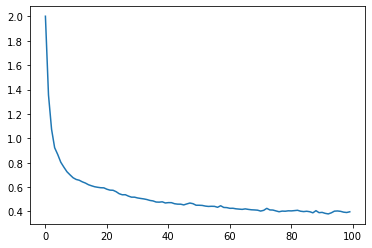

In [12]:
# plot losses
plt.plot(clf.history['loss'])

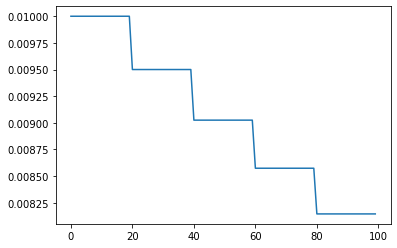

In [13]:
# plot learning rates
plt.plot(clf.history['lr'])

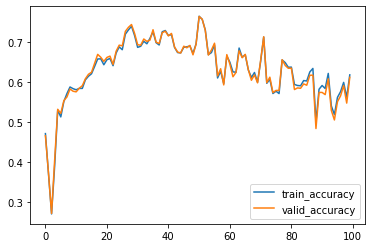

In [14]:
# plot accuracy
plt.plot(clf.history['train_accuracy'], label='train_accuracy')
plt.plot(clf.history['valid_accuracy'], label='valid_accuracy')
plt.legend()

In [15]:
# 自动识别是否为多分类任务
clf.classes_

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [16]:
clf.predict(X_test)

array([5, 3, 3, ..., 1, 2, 4], dtype=int64)

In [17]:
clf.predict_proba(X_test)

array([[1.0476780e-01, 2.2406912e-01, 3.7612738e-03, ..., 6.5850478e-01,
        8.8507999e-03, 4.5469355e-05],
       [2.7374566e-02, 1.0704312e-01, 5.7603592e-01, ..., 4.7170207e-02,
        1.6470745e-01, 7.7644169e-02],
       [3.5278455e-05, 1.3398968e-03, 5.3790921e-01, ..., 3.1577374e-04,
        2.5083569e-01, 3.5369160e-06],
       ...,
       [4.9040851e-01, 2.6896083e-01, 1.4491394e-02, ..., 1.9872878e-01,
        1.6582178e-02, 1.0802057e-02],
       [1.7751917e-01, 8.2181627e-01, 1.9877475e-06, ..., 5.1503250e-04,
        4.1416047e-06, 1.4230578e-04],
       [2.1172150e-06, 4.3365156e-04, 8.7576181e-02, ..., 3.2910368e-06,
        2.4472153e-02, 4.3576538e-06]], dtype=float32)

In [18]:
# 特征的相对重要性
clf.feature_importances_

array([1.13936014e-01, 4.26053230e-02, 3.07982931e-02, 1.17345082e-02,
       1.75040486e-02, 2.10661302e-01, 4.59951455e-03, 2.09881077e-03,
       9.89809585e-03, 2.24697209e-02, 3.05311755e-02, 4.70127659e-03,
       6.10885838e-02, 4.99650224e-02, 8.64631552e-04, 3.93420537e-03,
       5.91522968e-03, 2.66309510e-03, 1.55809970e-02, 6.75076648e-05,
       4.88980669e-04, 4.37084977e-03, 3.82479155e-03, 4.17919837e-03,
       1.60749398e-02, 3.46094884e-02, 5.21890003e-04, 5.28342726e-03,
       9.29260321e-04, 9.40670981e-03, 2.45773707e-02, 2.36699128e-02,
       1.24371964e-02, 1.02929005e-04, 6.13925467e-03, 9.72545730e-03,
       9.34012164e-03, 2.65259450e-03, 3.70508681e-03, 1.32998532e-05,
       8.94611874e-04, 2.45951208e-06, 7.08987318e-02, 3.06232828e-02,
       2.83716298e-04, 2.44355188e-03, 1.72957783e-03, 1.52851330e-03,
       1.06745810e-02, 3.64332452e-04, 1.22748022e-02, 4.54865159e-03,
       4.96986600e-02, 3.64412170e-04])